## ROOT tutorial exercises 2 -> 9 using RDataFrame

Note that RDataFrame is an actively evolving class, so you'll want to check the [documentation](https://root.cern/doc/v616/classROOT_1_1RDataFrame.html "RDataFrame in ROOT 6.16") for the particular version of ROOT you're using. The following code has been developed using ROOT 6.16. 

In [1]:
import ROOT

fileName = "~seligman/root-class/experiment.root"
treeName = "tree1"

# Just for fun, turn on multi-threaded execution.
# To turn off multi-threading, just comment out
# the line. 
ROOT.ROOT.EnableImplicitMT

# Define the dataframe.
RDF = ROOT.RDataFrame
# In ROOT 6.10 through 6.12, the above line would be:
# RDF = ROOT.ROOT.Experimental.TDataFrame

# Read in the ntuple into the RDataFrame
dataframe = RDF(treeName, fileName)

Welcome to JupyROOT 6.24/08


### C++ tips

If you're writing stand-alone C++ code, you'll need to include the following if you're running ROOT 6.14 or later:

```c++
#include <TCanvas.h>
#include <RDataFrame.h>
```
For ROOT 6.10 through 6.12, you'd use

```c++
#include <ROOT/Experimental/TDataFrame.h>
```

Then in the main code:

```c++
ROOT::EnableImplicitMT(); // If you want multi-threaded execution.
RDF = ROOT.RDataFrame;
// In ROOT 6.10 through 6.12, the above line would be:
// RDF = ROOT.ROOT.Experimental.TDataFrame;

auto dataframe = RDF(treeName, fileName);
auto fileName = "~seligman/root-class/experiment.root"
auto treeName = "tree1";
auto dataframe = RDF(treeName, fileName);
```

The rest of the Python code should work pretty much as-is, except put ```auto``` before the declaration of any new variables and semi-colons at the end of all the lines. 

In [2]:
# Set up the dataframe's actions. Note that none of the
# following code will cause the ntuple to be
# read. That won't happen until we execute a method
# that requires actual data to be accessed; see the
# next cell. 

exercise2Hist = dataframe.Histo1D("chi2")
exercise3Hist = dataframe.Histo1D("ebeam")

# For Histo2D and Histo3D, we have to supply the axis limits.
# For Histo1D it's optional. Note how the arguments in the inner parenthesis
# match the arguments you'd supply when defining a TH2D object.
exercise5Hist = dataframe.Histo2D(("exercise5","chi2 vs. ebeam",100,0,20,100,148,151),"chi2","ebeam")

# Derived variables (aka adding columns to the RDataFrame). 
# Note that I'm stringing the new column definitions for all
# the exercises one after another in the same command. 
# I could define the new columns one at a time if I wanted. 
derived = dataframe.Define("pt","sqrt(px*px + py*py)") \
    .Define("theta","atan2(pt,pz)") \
    .Define("emeas","sqrt(px*px + py*py + pz*pz)") \
    .Define("eloss","ebeam - emeas")

exercise6Hist = derived.Histo1D("pt")
exercise7Hist = derived.Histo1D("theta")
exercise8Hist = derived.Histo2D(("exercise8","chi2 vs. theta",100,0.0,20.,100,0.0,0.2),"chi2","theta")

# Two things at once: Define a Filter (aka a cut on the ntuple entries)
# and Count the number of entries in the RDataFrame after the cut. 
cut = "pz < 145"
cutCount = derived.Filter(cut).Count()

# For the second part of Exercise 8, apply the physics cut.
# Note that the syntax of the cut must be in C++, not Python,
# since it's ROOT's TFormula class that's interpeting the string.

physicsCut = "chi2 < 1.5 && theta < 0.15"
physicsCutApplied = derived.Filter(physicsCut)
exercise8CutHist = physicsCutApplied.Histo2D(("exercise8cut","chi2 vs. theta",100,0.0,1.5,100,0.0,0.2),"chi2","theta")

exercise9Hist = derived.Histo2D(("exercise9","eloss vs. zv",100,0.0,15,100,0,80),"eloss","zv")


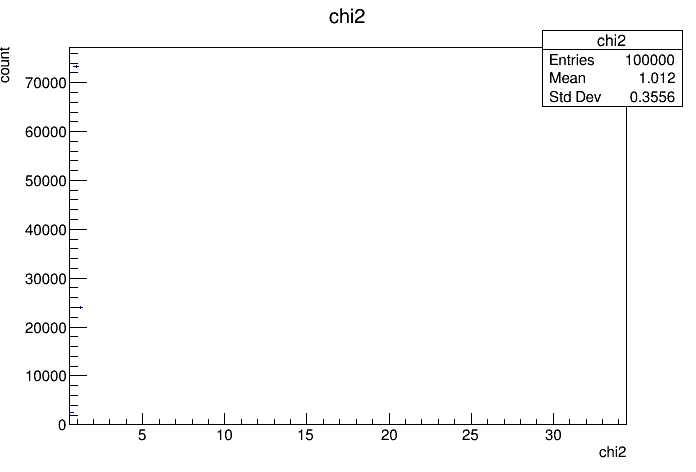

In [3]:
# Define a blank canvas for drawing the histograms.

myCanvas = ROOT.TCanvas()

# Exercise 2

# It's only at this point, when we actually do something that extracts the contents
# of the RDataFrame, that we read the events from file experiment.root.

# All the .Draw() methods in subsequent cells of this notebook won't reread 
# experiment.root again. The tasks were all defined in the previous cell [2], and
# I'm careful to define no new RDataFrame tasks in subsequent cells. Accessing the
# contents of a histogram is not a "task" in this context.

exercise2Hist.Draw("E")
myCanvas.Draw()

 FCN=54.5178 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.47998e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.45981e+03   2.11377e+01   6.28309e-02  -4.64713e-06
   2  Mean         1.49999e+02   4.73786e-04   7.15253e-05   1.55429e-02
   3  Sigma        1.49729e-01   3.34453e-04   2.21153e-06  -1.42905e-01


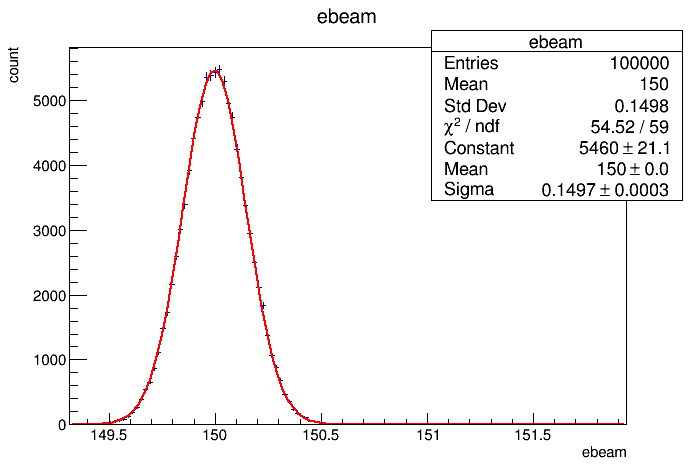

In [4]:
# exercises 3 and 4
exercise3Hist.Draw("E")
exercise3Hist.Fit("gaus")
ROOT.gStyle.SetOptFit(1)
myCanvas.Draw()

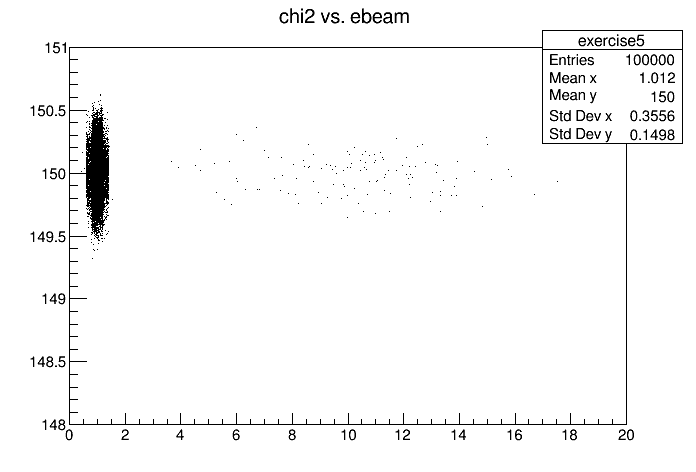

In [5]:
# Exercise 5
exercise5Hist.Draw()
myCanvas.Draw()

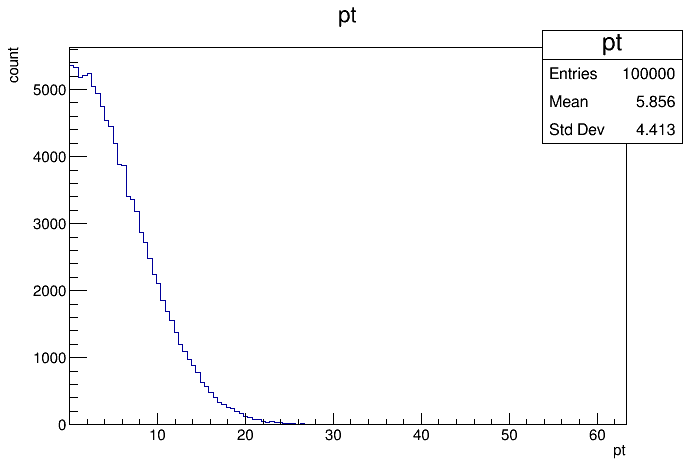

In [6]:
# Exercise 6
exercise6Hist.Draw()
myCanvas.Draw()

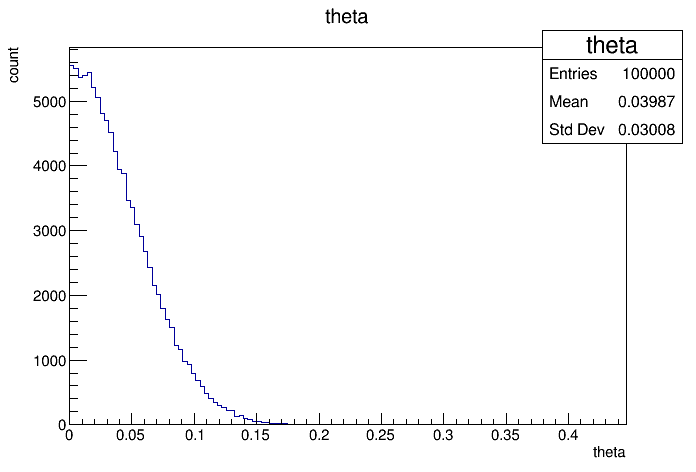

In [7]:
# Exercise 7
exercise7Hist.Draw()
myCanvas.Draw()

In [8]:
# Fetching the result of a Count()
print ("The number of events with",cut,"is",cutCount.GetValue())

The number of events with pz < 145 is 14962


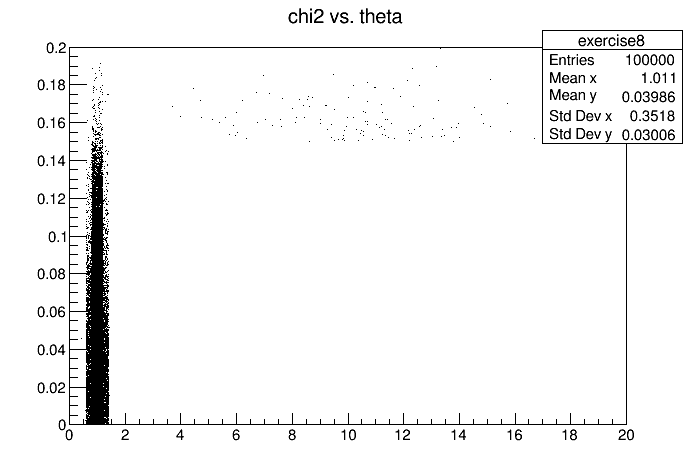

In [9]:
# Exercise 8
exercise8Hist.Draw()
myCanvas.Draw()

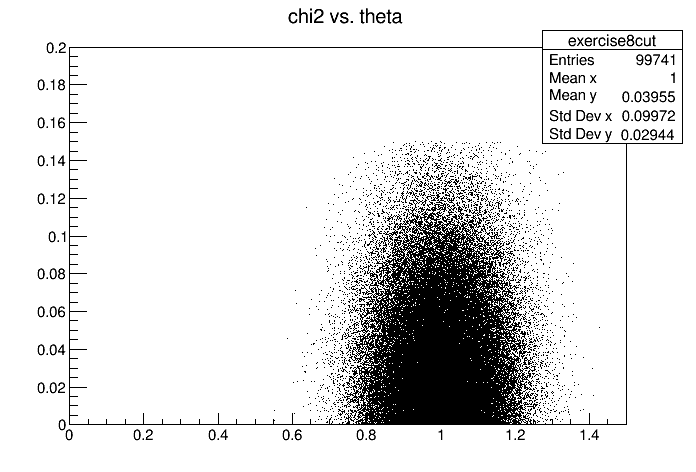

In [10]:
# Exercise 8 (continued)
exercise8CutHist.Draw()
myCanvas.Draw()

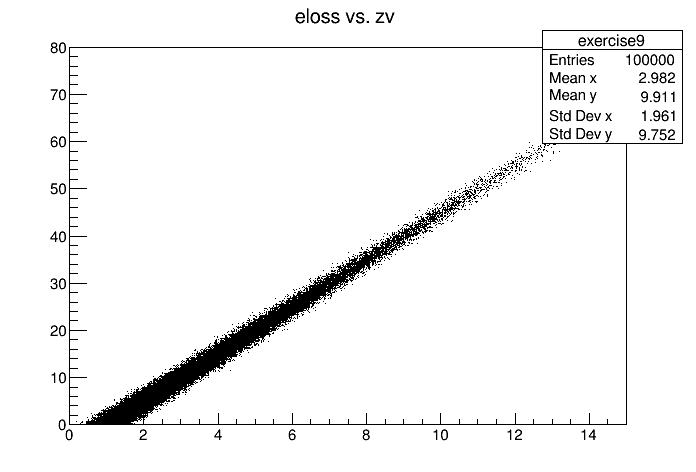

In [11]:
# Exercise 9
exercise9Hist.Draw()
myCanvas.Draw()